In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [29]:
#import dataset
import numpy as np
import pandas as pd

tw_df = pd.read_json('Data/sandy_silver.json', lines=True) 
tw_df.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1415137011187339266,1415137011187339264,2021-07-14 08:02:10 India Standard Time,2021-07-14,08:02:10,530,462301069,premier_silver,Sandy Silver,,...,,,,,,[],,,,
1,1415034238500540416,1415032661270319104,2021-07-14 01:13:47 India Standard Time,2021-07-14,01:13:47,530,462301069,premier_silver,Sandy Silver,,...,,,,,,[],,,,
2,1415032661270319108,1415032661270319104,2021-07-14 01:07:31 India Standard Time,2021-07-14,01:07:31,530,462301069,premier_silver,Sandy Silver,,...,,,,,,[],,,,


In [30]:
#breaking into lines
all_sentences = []

for word in tw_df['tweet']:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['Do', 'you', 'have', 'questions', 'about', 'COVID-19', 'vaccines?', 'Get', 'answers', 'from', 'health', 'care', 'professionals.', 'Share', 'accurate', 'info', 'with', 'your', 'friends', 'and', 'family.', 'The', 'more', 'people', 'get', 'vaccinated,', 'the', 'safer', 'we', 'will', 'all', 'be', 'here', 'in', 'the', '#Yukon', 'and', 'across', 'Canada.', 'We', 'stand', 'in', 'solidarity', 'with', 'the', 'Penelakut', 'Tribe', 'and', 'Indigenous', 'Canadians', 'through', 'this', 'difficult', 'time', 'Supports', 'are', 'available', 'to', 'Yukoners', 'both', 'in', 'Whitehorse', '&amp;', 'rural', '#Yukon', 'communities', 'For', 'Rapid', 'Access', 'Counselling', 'call', '1-867-456-3838', 'More', 'info', 'here:', 'https://t.co/XDntE54eXE', 'It’s', 'heartbreaking', 'to', 'hear', 'of', 'the', 'unmarked', 'graves', 'found', 'on', 'Penelakut', 'Island', 'at', 'the', 'site', 'of', 'the', 'Kuper', 'Island', 'Industrial', 'School', 'Our', 'communities', 'are', 'still', 'grieving', 'from', 'the', 'findi

In [31]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [32]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['do',
 'you',
 'have',
 'question',
 'about',
 'covid19',
 'vaccin',
 'get',
 'answer',
 'from',
 'health',
 'care',
 'profession',
 'share',
 'accur',
 'info',
 'with',
 'your',
 'friend',
 'and',
 'famili',
 'the',
 'more',
 'peopl',
 'get',
 'vaccin',
 'the',
 'safer',
 'we',
 'will',
 'all',
 'be',
 'here',
 'in',
 'the',
 'yukon',
 'and',
 'across',
 'canada',
 'we',
 'stand',
 'in',
 'solidar',
 'with',
 'the',
 'penelakut',
 'tribe',
 'and',
 'indigen',
 'canadian',
 'through',
 'this',
 'difficult',
 'time',
 'support',
 'are',
 'avail',
 'to',
 'yukon',
 'both',
 'in',
 'whitehors',
 'amp',
 'rural',
 'yukon',
 'communiti',
 'for',
 'rapid',
 'access',
 'counsel',
 'call',
 '18674563838',
 'more',
 'info',
 'here',
 'httpstcoxdnte54ex',
 'it',
 'heartbreak',
 'to',
 'hear',
 'of',
 'the',
 'unmark',
 'grave',
 'found',
 'on',
 'penelakut',
 'island',
 'at',
 'the',
 'site',
 'of',
 'the',
 'kuper',
 'island',
 'industri',
 'school',
 'our',
 'communiti',
 'are',
 'still',
 'g

In [33]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['question',
 'covid19',
 'vaccin',
 'answer',
 'health',
 'care',
 'profession',
 'share',
 'accur',
 'info',
 'friend',
 'famili',
 'peopl',
 'vaccin',
 'safer',
 'yukon',
 'canada',
 'stand',
 'solidar',
 'penelakut',
 'tribe',
 'indigen',
 'canadian',
 'difficult',
 'time',
 'support',
 'avail',
 'yukon',
 'whitehors',
 'amp',
 'rural',
 'yukon',
 'communiti',
 'rapid',
 'access',
 'counsel',
 '18674563838',
 'info',
 'httpstcoxdnte54ex',
 'heartbreak',
 'hear',
 'unmark',
 'grave',
 'found',
 'penelakut',
 'island',
 'site',
 'kuper',
 'island',
 'industri',
 'school',
 'communiti',
 'griev',
 'find',
 'site',
 'canada',
 'know',
 'heavi',
 'heart',
 'grate',
 'canadianforc',
 'tireless',
 'effort',
 'flood',
 'relief',
 'work',
 'yukon',
 'congratul',
 'athlet',
 'territori',
 'sport',
 'organ',
 'yukongov',
 'partnership',
 'yukon',
 'lotteri',
 'commiss',
 'sport',
 'canada',
 'announc',
 '1621117',
 'fund',
 'recreat',
 'group',
 'athlet',
 'offici',
 'nunavummiut',
 'nunavut'

In [34]:
tw_df_st = pd.DataFrame(stem2)

tw_df_st = tw_df_st[0].value_counts()

In [35]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in tw_df_st:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 171, 2: 49, 3: 12, 4: 3, 7: 2, 5: 2, 18: 1, 9: 1})

In [10]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


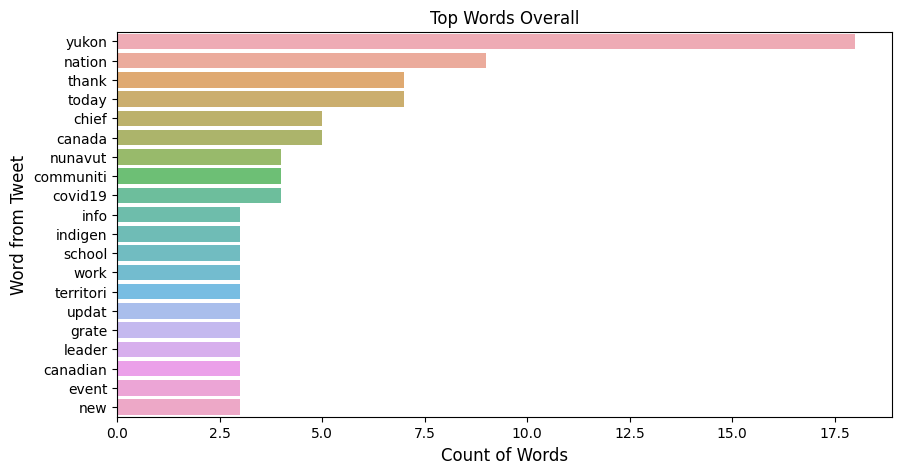

In [36]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

tw_df_st = tw_df_st[:20,]
plt.figure(figsize=(10,5))
sns.barplot(tw_df_st.values, tw_df_st.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [12]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [13]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [37]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


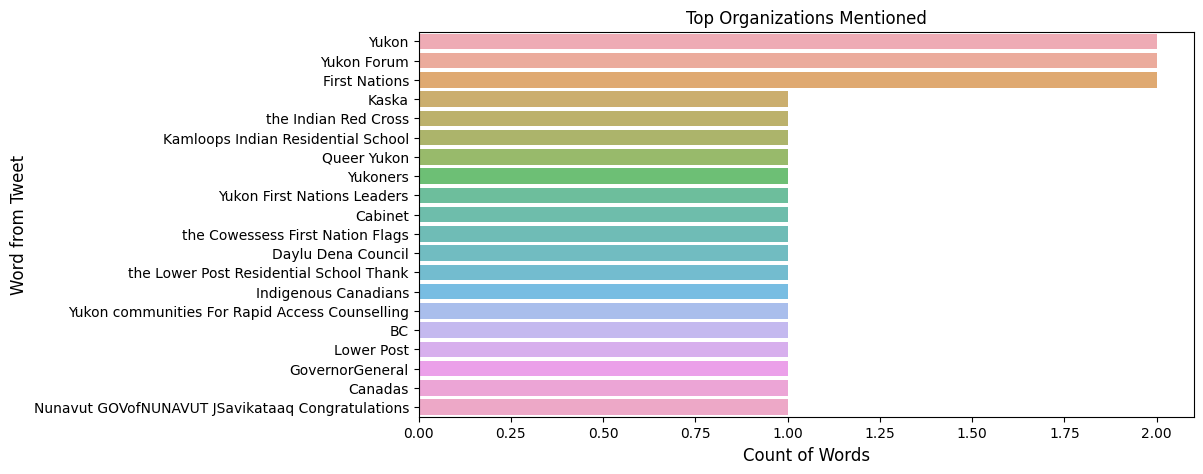

In [38]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [39]:
df.to_csv("silver.csv")